<center><img src="img/skillfactorylogo.png"></center>

<h1><center>Курс "Практический Machine Learning"</center></h1>
<h3><center>Шестаков Андрей</center></h3>
<hr>
<h2><center>Введение в ML, типы задач, оценка качества</center></h2>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print u'Так надо'

import warnings
warnings.filterwarnings('ignore')
    
from IPython.display import YouTubeVideo


# Пару слов о себе

* Шестаков Андрей 
* **2011-2016**: Разработчик-исследователь, компания Forecsys
* **2016-2018**: Программист-математик, департамент рекламных технологий Mail.Ru
* **2018+**: Руководитель группы предиктивной аналитики, департамент рекламных технологий Mail.Ru

* [«Почта Банк» проследит за клиентами с помощью технологий Mail.ru.](http://www.tadviser.ru/index.php/%CF%F0%EE%E5%EA%F2%3A%CF%EE%F7%F2%E0_%C1%E0%ED%EA_%28%F3%F1%EB%F3%E3%E8_Mail.ru%29)

# Темы, которые мы с вами изучим

* Введение в ML, мотивация, типы задач, меры качества
* Методы классификации
* Методы регрессии

# Мотивация

## Мотивация

<center><img src='img/data_everywhere.jpg' width=700></center>

## Data everywhere

* Социальные сети
* Онлайн-сервисы
* Мобильные устройства
* Фитнес-трекеры
* Интернет-вещей
* ...

* Накапливается очень много **данных** из всевозможных источников
* Хочется их не просто хранить, но и извлекать из них **знания, закономерности**


* В широком смысле, **машинное обучение** – набор методов, позволяющий обучать вычислительные системы решать определенную задачу без явного программирования

## Мотивация

<center><img src='img/ds-venn.png' width=500></center>

## Мотивация

<center><img src='img/ds-venn2.jpg' width=700></center>

[50 years of data science](http://courses.csail.mit.edu/18.337/2015/docs/50YearsDataScience.pdf)

## Простые примеры

* Фильтрация спама
    * если отправитель часто фигурирует в черных списках -> спам
    * если письмо содержит 'специальное предложение' и отправитель ранее не встречался во "входящих" -> спам
    * ...


* Фильтрация машенических операций
    * если операции за последние 5 минут содержат очень маленьие и большие суммы - фрод
    * если операция по этому mcc регулярно просиходила ранее - не фрод
    * ...


* Методы машинного обучения постараются сами 
    * определить ключевые зависимости в **размеченных данных**
    * найти структуру в **неразмеченных данных**

## Обучение по прецедентам

* Множество объектов $𝑂$
* Каждому объекту $o \in O$ можно поставить в соответствие набор признаков $(x,y)$, где
    * $x \in X$ - вектор описательных признаков (предикторов)
    * $y \in Y$ - целевой признак

* Существует неизвестная зависимость  $f:X \rightarrow Y$

* Задачи: 
    1. Используя конечный набор примеров $(x,y)$, обучить модель $a(x) = \hat{y}$, аппроксимирующую $f$
    2. Применить алгоритм $a(x)$ на новых объектах


## Простой пример

<center><img src='img/example1.png' width=700></center>

* Эти признаки очевидно как-то влияют на цену ($f: X \rightarrow Y$)
* Составим модель, которая будет принимать на входе эти признаки: 
    $$a(x) = a(total\_area, nmbr\_of\_bedrooms, house\_age) = \hat{y}$$
* Пусть она будет иметь линейный вид:
    $$a(x) = w_0 + w_1\cdot total\_area + w_2 \cdot nmbr\_of\_bedrooms + w_3 \cdot house\_age$$
* Обучение - найти коэффициенты $w_0,\dots, w_3$, минимизирующие ошибку на обучающей выборке

## Простой пример 2

| Отзыв                                                                          | Тональность                                            |
|--------------------------------------------------------------------------------------------|--------------------------------------------------------|
| Преподаватели сильные, отвечали на вопросы оперативно (по большей части), что приятно — даже в выходные и поздно вечером.                                     | +1 |
| Здорово, что были трансляции по доп.материалу (обработка текстов). Хотелось бы побольше такого. От Петра много лайфхаков по обработке текста узнала. Спасибо ему! | +1 |
| Очень жаль, что мало рассказали про Deep Learning | -1    |

* Какие признаки будут здесь?
* Как будет выглядеть линейная модель?

## Основные моменты
* Как сформулировать задачу?
* Как выбирать/составлять признаковое описание объектов?
* Как определяется и обучается $a(x)$?
* Как оцениваеться качество $a(x)$?

# Основные типы задач и типы признаков

## Основные типы задач

* Обучение с учителем (Supervised Learning) 
    * Модель подстаивается под целевой признак $y$
    * Классификация: 
        * $Y=\{−1, +1\}$  (Bad, Good в кредитном скорринге)
        * $Y=\{1, 2, 3, \dots, C\}$  (Типизация автивности)
    * Регрессия: $Y \in \mathbb{R}$ (оценка стоимости жилья)
    * Ранжирование: $Y \in \mathbb{R}$ (оценка релевантности)
* Обучение без учителя (Unsupervised Learning)
    * Кластеризация (сегментация клиентов магазина)
    * Уменьшение признаковго пространства (составление тематик интересов)
    * Выявление ассоциативных правил
* Обучение с подкреплением (Reinforcement Learning)

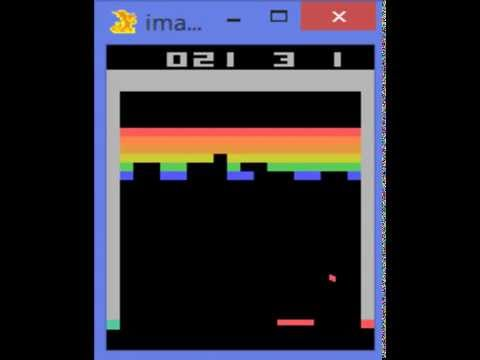

In [6]:
YouTubeVideo('V1eYniJ0Rnk', width=700, height=600)

## Типы признаков

* Бинарные - $x_i\in \{0, 1\}$
* Категориальные - $|x_i|<\infty$
* Порядковые - $|x_i|<\infty$ 
* Вещественные - $x_i \in \mathbb{R}$

## Примеры

### Задача "кредитный скоринг"
* Объект — заявка на выдачу кредита банком 
* Ответ — вернет ли клиент кредит
* Тип задачи?


### Задача "кредитный скоринг" - признаки
* Бинарные: пол, наличие телефона, и т.д.
* Категориальные: место жительства, профессия, семейный статус, работодатель, и т.д.
* Порядковые: образование, должность, и т.д.
* Вещественные: возраст, зарплата, стаж работы, доход семьи, сумма кредита, и т.д.

### Задача "предсказание оттока клиентов"
* Объект — абонент в определенный момент времени 
* Ответ — уйдет или не уйдет в следующем месяце
* Тип задачи?

### Задача "предсказание оттока клиентов" - признаки
* Бинарные: корпоративный клиент, подключенные услуги, и т.д.
* Категориальные: регион проживания, тарифный план, и т.д.
* Вещественные: длительность разговоров, количество СМС, частота оплаты, объем трафика, и т.д.

### Задача "категоризация новостной статьи"
* Объект — текст статьи
* Ответ — набор тегов-категорий
* Тип задачи?


### Задача "категоризация новостной статьи" - признаки
* Бинарные: наличие тех или иных ключевых слов
* Категориальные: регион
* Вещественные: количество ссылок на другие статьи соответствующих категорий

### Задача "оценка стоимости автомобиля"
* Объект — автомобиль
* Ответ — стоимость в рублях
* Тип задачи?


### Задача "оценка стоимости автомобиля" - признаки
* Бинарные: первичный или вторичный рынок, тюнинг
* Категориальные: цвет, коробка передач, тип кузова...
* Вещественные: пробег, объем двигателя, мощность двигателя..

# Обобщающая способность

## Обобщающая способность алгоритма

* Можно построить алгоритм с идеальным качеством на обучающей выборке
* Profit???

* Nope...
* Важно понимать, насколько хорошо работает алгоритм на объектах, которые он ранее не видел


* Недообучение (underfitting) – модель сильно упростила искомую зависимость
* Переобучение (overfitting) – модель подогналась даже под шум в данных

## Обобщающая способность алгоритма

<center><img src='img/overfit.png' width=900></center>

## Оценка обобщающей способности (оффлайн)

<center><img src='img/cv.png' width=900></center>

# Меры качества классификации

## Меры качества классификации

* Как правило, классификаторы выдают не просто предсказанную метку класса, но и степень уверенности в ней
* Основные меры качества
    * Accuracy
    * Precision, Recall, F-measure
    * ROC-AUC, PR-AUC Gini-index, Model-lift
    * Log-loss

## Матрица перемешивания

Матрица перемешивания $M=\{m_{ij}\}_{i,j=1}^{C}$ показывает количество объектов класса $с_{i}$, которые были отнесены классификатором к классу $с_{j}$.

<center><img src='img/confusion.jpg'><center/>

## Матрица перемешивания (2 класса)


<center><img src='img/binary_conf.png'></center>
* TP (true positive) - Верное предсказание (+1)
* FP (false positive) - Ошибка первого рода (ложная тревога)
* FN (false negative) - Ошибка второго рода (пропуск цели)
* TN (true negative) - Верное предсказание (-1)
* Pos (Neg) - Общее количество +1 и -1

## Меры на основе матрицы перемешивания

<center><img src='img/binary_conf.png'></center>


* $ \text{accuracy} = \frac{TP + TN}{Pos+Neg}$
* $ \text{error rate} = 1 -\text{accuracy}$
* $ \text{recall} =\frac{TP}{TP + FN} = \frac{TP}{Pos}$ - (полнота)
* $ \text{precision} =\frac{TP}{TP + FP}$ - (точность)
* $ \text{F}_\beta \text{-score} = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$
    * почему не среднее или максимум?


* Можно ли посчитать эти меры для многоклассовой классификации?

In [7]:
from mpl_toolkits.mplot3d import Axes3D


def demo_fscore(beta=1):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    prec = np.linspace(0, 1, 100)
    rec = np.linspace(0, 1, 100)
    
    P, R = np.meshgrid(prec, rec)
    
    F = (1 + beta**2) * (P*R)/((beta**2 * P) + R)
    
    surf = ax.plot_surface(P, R, F, cmap=plt.cm.coolwarm, alpha=0.3,
                               linewidth=0, antialiased=False)

    ax.set_zlim(-0.01, 1.01)
    
    ax.view_init(30,200)
    ax.set_xlabel('precision')
    ax.set_ylabel('recall')
    ax.set_zlabel('F-score')
    ax.set_title('beta = %.2f'%beta)

    fig.colorbar(surf)
    plt.show()
    
   

In [8]:
fig = interact(demo_fscore, beta=FloatSlider(min=0.1, max=5, step=0.3, value=1))

A Jupyter Widget

## Меры качества на основе уверенности классификатора

## ROC кривая

* Выбор порога классификации - отдельная большая задача
* Можно ли как-то обойтись без него и сравнить неколько моделей?


* ROC кривая - показывает зависимость между TPR (верным предсказанием) и FPR (ложным срабатыванием)
<center><img src='img/roc.png' width=400></center>


## ROC кривая

* Классификатор $a(x)$ возвращает степень принадлежности к классу "+1" - score(x).
* Упорядочим объекты по убыванию score(x)
* Смотрим сверху вниз
    * Если объект принадлежит классу "+1" - сдвиг вверх на $1/Pos$
    * Если объект принадлежит классу "-1" - сдвиг вправо на $1/Neg$
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"><img src='img/roc1.png'></th>
    <th class="tg-031e"><img src='img/roc2.png'></th>
  </tr>
</table>



## Как сравнивать ROC-кривые?
<center><img src='img/roc3.png'></center>

## ROC-AUC
* Площадь под ROC кривой

* AUC$\in[0,1]$
    * AUC = 0.5 - случайный классификатора
    * AUC = 1 - идеальный классификатор

## Precision-Recall Кривая

* Строится аналогичным образом, но по осям Precision и Recall для разных порогов

<center><img src='http://scikit-learn.org/stable/_images/sphx_glr_plot_precision_recall_001.png'></center>

## Model Lift

* Редко используется при соревнованиях по ML и DA
* Очень любят и понимают заказчики


* Вновь упорядочим объекты по убыванию score(x)
* Разобьем на процентили
* Посчитаем отношение доли +1 в процентиле к доле +1 по всей выборке
<center><img src='img/lift.png' width=700></center>


## Logloss

* Но иногда бывает важно не просто правильно упорядочить объекты, а именно увазывать высокие вероятности

* Logloss (cross entropy):
$$
    \frac{1}{N}\sum_{n=1}^{N}\sum_{c=1}^{C}\mathbb{I}[y_{n}=c]\ln(\widehat{p}(y=c|x_{n}))
$$


## Резюме

* Машинное обучение позволяет находить зависимости в данных
* Основные типы задач - классификация, регрессия, ранжирование
* Оценка качества с помощью кросс-валидации и отложенной выборки

# FYI

* [50 years of data science](http://courses.csail.mit.edu/18.337/2015/docs/50YearsDataScience.pdf)
* [A Few Useful Things to Know about Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Open Data Science Russion Community](http://ods.ai/)
* [ML Trainings](https://www.youtube.com/channel/UCeq6ZIlvC9SVsfhfKnSvM9w)
* [Kaggle](https://www.kaggle.com/)